<a href="https://colab.research.google.com/github/zahraa57/Unsupervised-ML/blob/main/ML2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/CCGENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.shape

(8950, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.isna().sum()/len(df)*100

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [ ]:
df=df.dropna(subset=['CREDIT_LIMIT'])
df=df.fillna(df['MINIMUM_PAYMENTS'].median())

In [ ]:
df.isna().sum()/len(df)*100

CUST_ID                             0.0
BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

# evaluate the difference between data transformation techniques
* check df distribution 
* standard scaller
* minmax scaller
* roboust scaller
* power scaller
* quantile scaller


In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler, QuantileTransformer, PowerTransformer

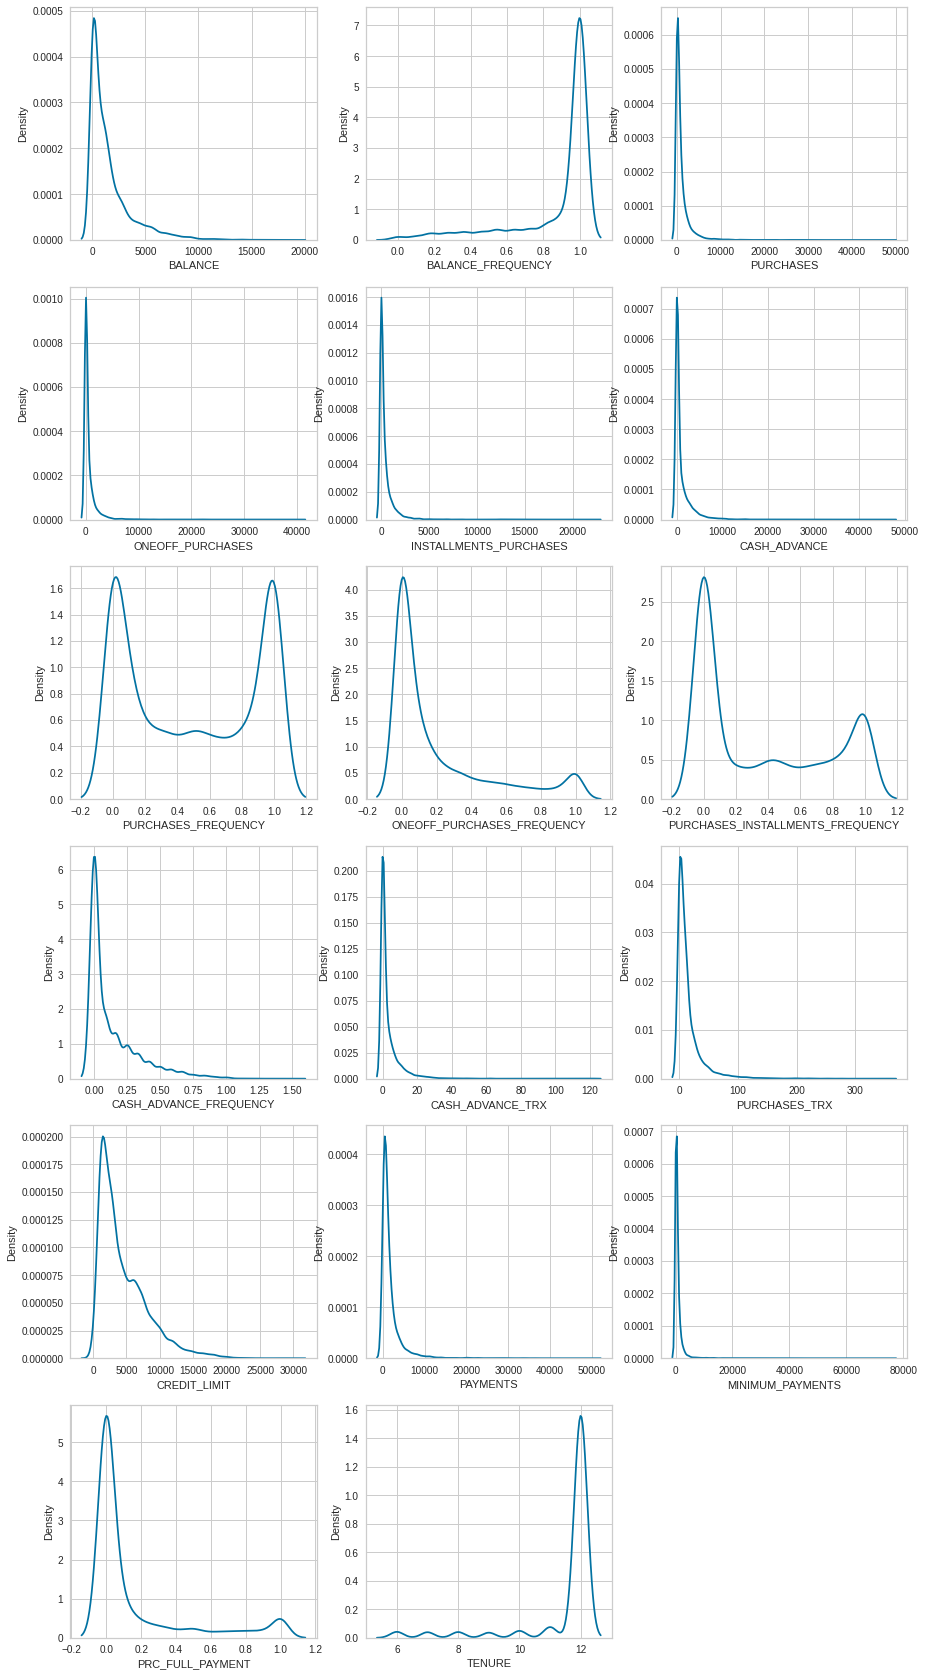

In [ ]:
plt.figure(figsize=(15,30))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(6, 3, i)
        sns.kdeplot(df[col])
        plt.xlabel(col)

In [ ]:
df=df.drop("CUST_ID",axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[Text(0.5, 1.0, 'original data')]

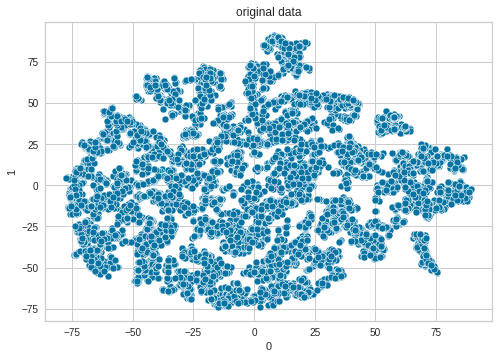

In [ ]:
tsne = TSNE(n_components=2, 
                       n_jobs=-1, 
                       random_state=42)
tsne_df = tsne.fit_transform(df)
tsne_df_original= pd.DataFrame(tsne_df, index=df.index)
sns.scatterplot(x=tsne_df_original[0], y=tsne_df_original[1]).set(title='original data')

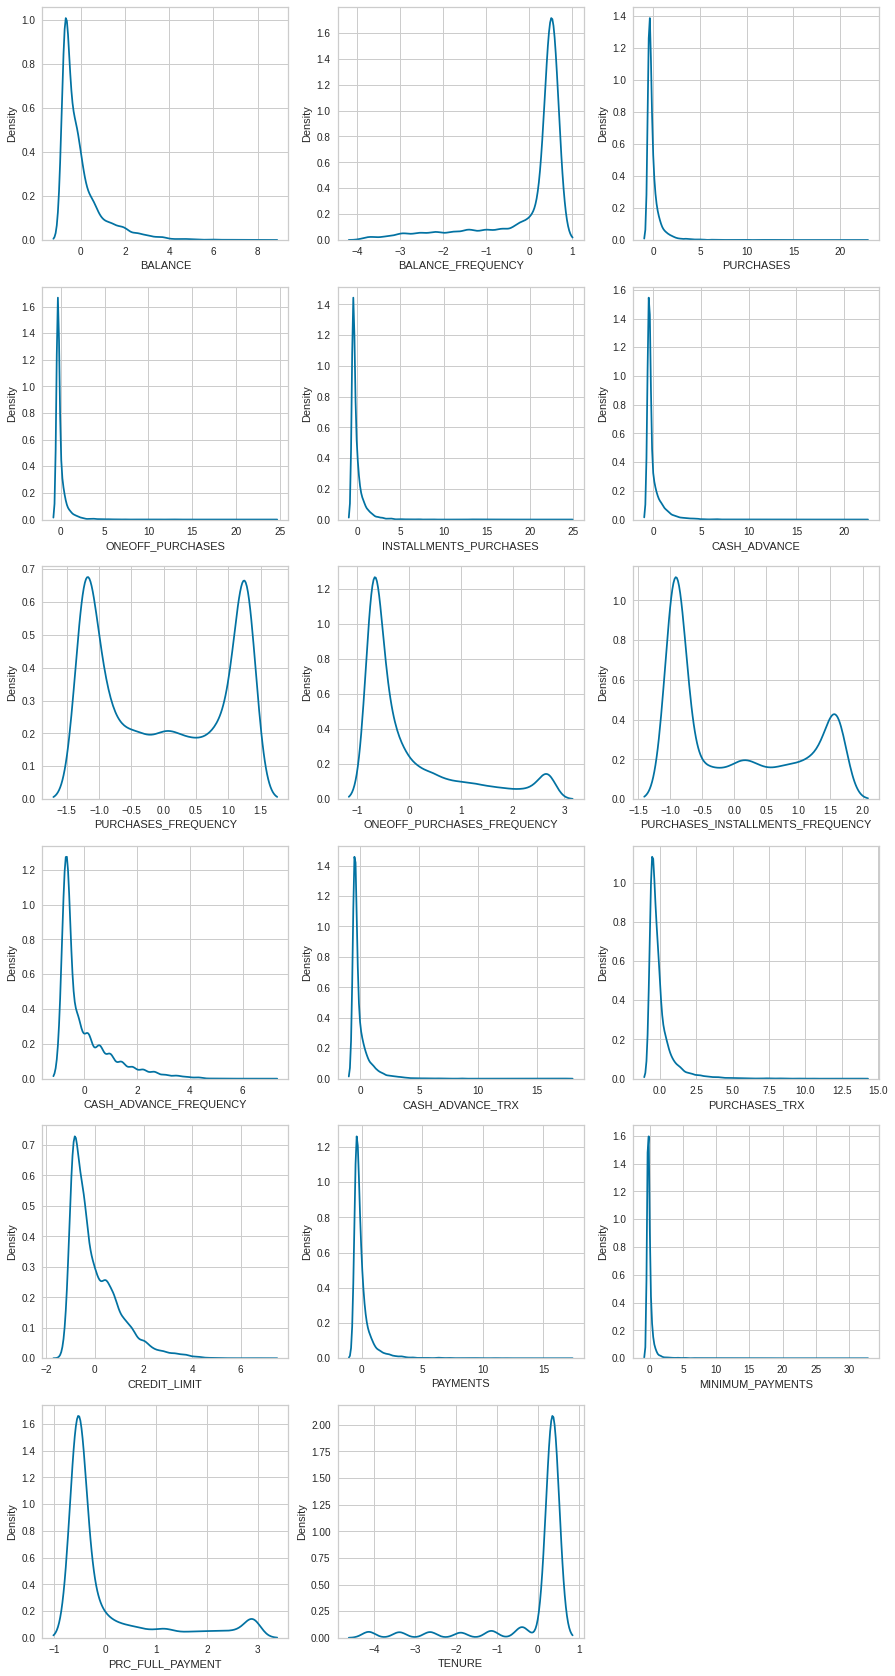

In [ ]:
std_scaller=StandardScaler()
df_std=pd.DataFrame(std_scaller.fit_transform(df),columns=df.columns)
plt.figure(figsize=(15,30))
for i, col in enumerate(df.columns):
        ax = plt.subplot(6, , i+1)
        sns.kdeplot(df_std[col])
        plt.xlabel(col)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[Text(0.5, 1.0, 'std data')]

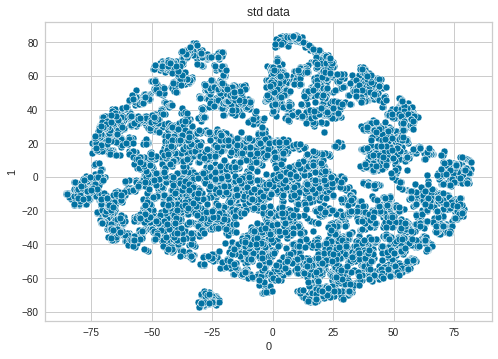

In [ ]:
tsne= TSNE(n_components=2, 
                       n_jobs=-1, 
                       random_state=42)
tsne_df = tsne.fit_transform(df_std)
tsne_df_std = pd.DataFrame(tsne_df, index=df.index)
sns.scatterplot(x=tsne_df_std[0], y=tsne_df_std[1]).set(title='std data')

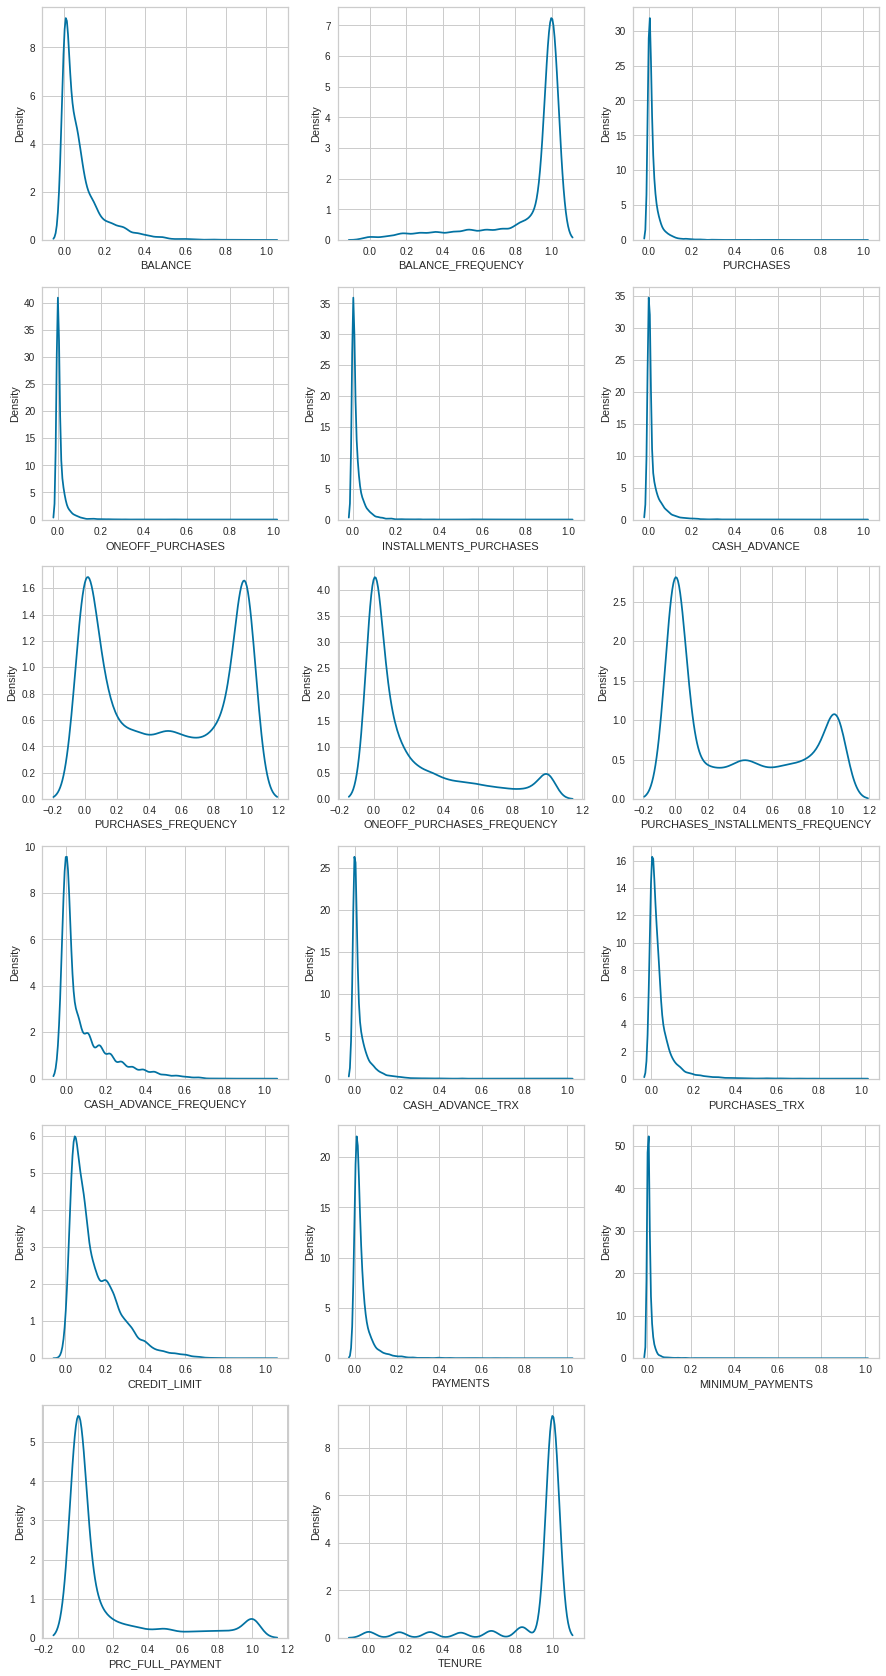

In [ ]:
mm_scaller=MinMaxScaler()
df_mm=pd.DataFrame(mm_scaller.fit_transform(df),columns=df.columns)
plt.figure(figsize=(15,30))
for i, col in enumerate(df.columns):
        ax = plt.subplot(6, 3, i+1)
        sns.kdeplot(df_mm[col])
        plt.xlabel(col)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[Text(0.5, 1.0, 'minmax data')]

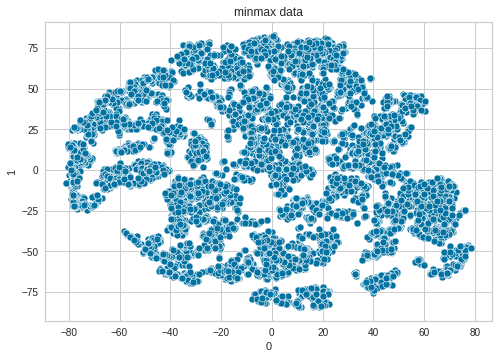

In [ ]:
tsne= TSNE(n_components=2, 
                       n_jobs=-1, 
                       random_state=42)
tsne_df = tsne.fit_transform(df_mm)
tsne_df_mm = pd.DataFrame(tsne_df, index=df.index)
sns.scatterplot(x=tsne_df_mm[0], y=tsne_df_mm[1]).set(title='minmax data')

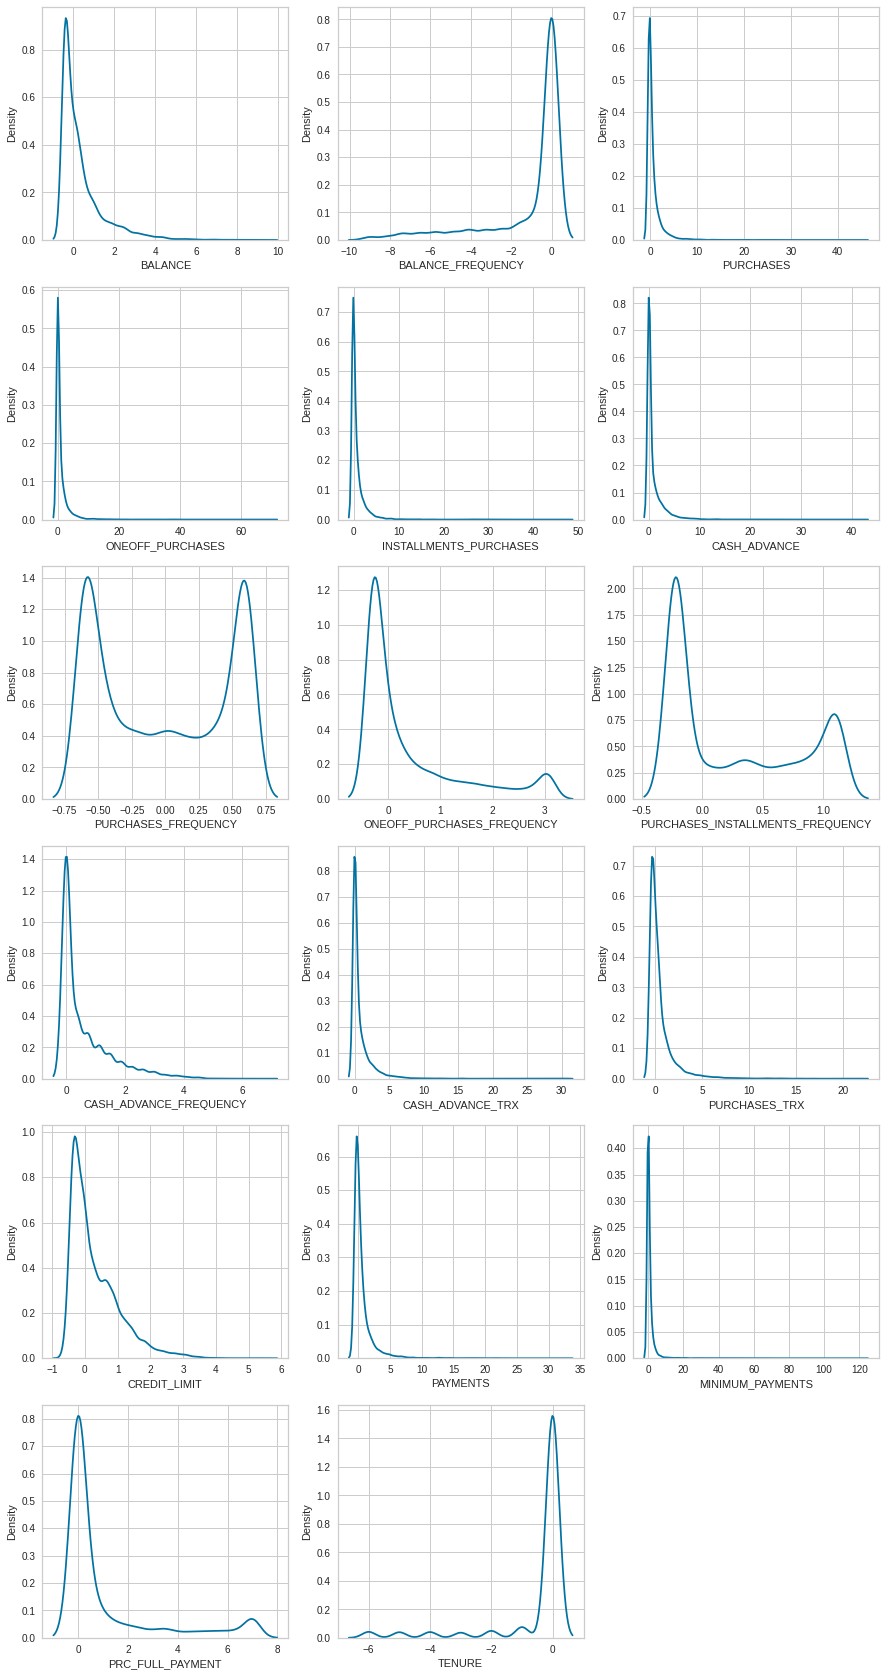

In [ ]:
rb_scaller=RobustScaler()
df_rb=pd.DataFrame(rb_scaller.fit_transform(df),columns=df.columns)
plt.figure(figsize=(15,30))
for i, col in enumerate(df.columns):
        ax = plt.subplot(6, 3, i+1)
        sns.kdeplot(df_rb[col])
        plt.xlabel(col)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[Text(0.5, 1.0, 'minmax data')]

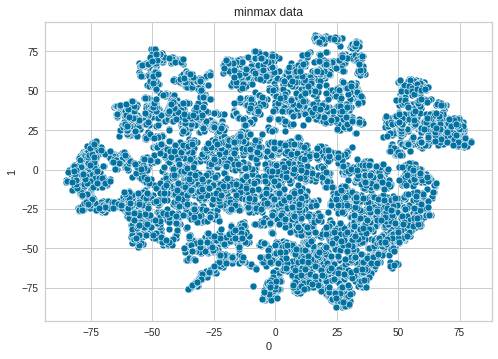

In [ ]:
tsne= TSNE(n_components=2, 
                       n_jobs=-1, 
                       random_state=42)
tsne_df = tsne.fit_transform(df_rb)
tsne_df_rb = pd.DataFrame(tsne_df, index=df.index)
sns.scatterplot(x=tsne_df_rb[0], y=tsne_df_rb[1]).set(title='minmax data')

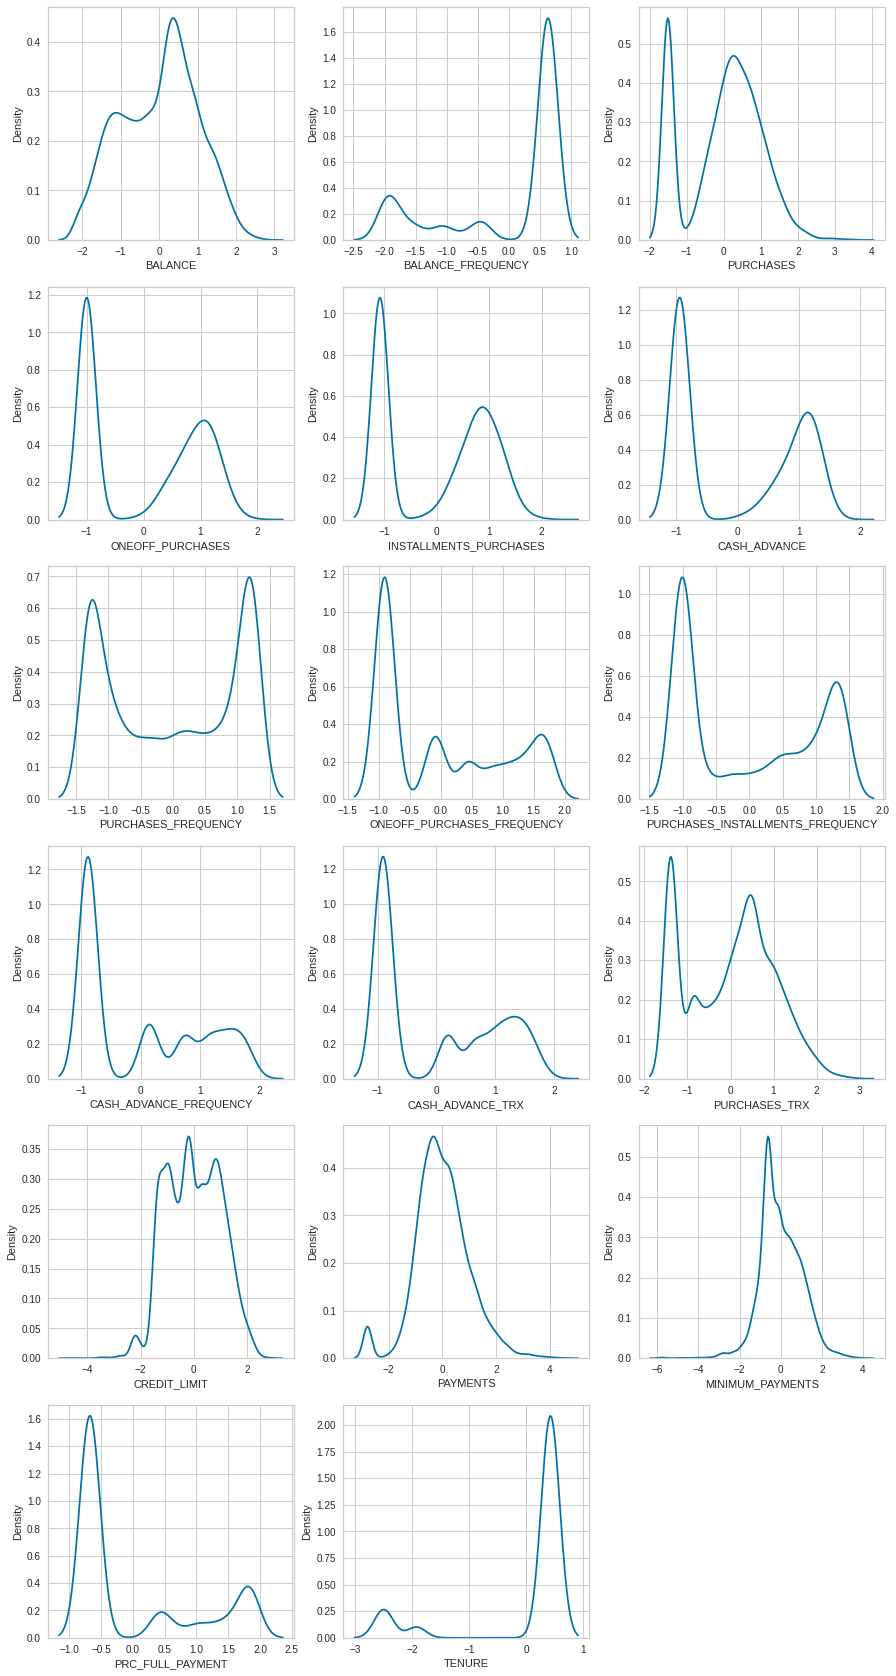

In [ ]:
Po_scaller=PowerTransformer()
df_po=pd.DataFrame(Po_scaller.fit_transform(df),columns=df.columns)
plt.figure(figsize=(15,30))
for i, col in enumerate(df.columns):
        ax = plt.subplot(6, 3, i+1)
        sns.kdeplot(df_po[col])
        plt.xlabel(col)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[Text(0.5, 1.0, 'power transformer space')]

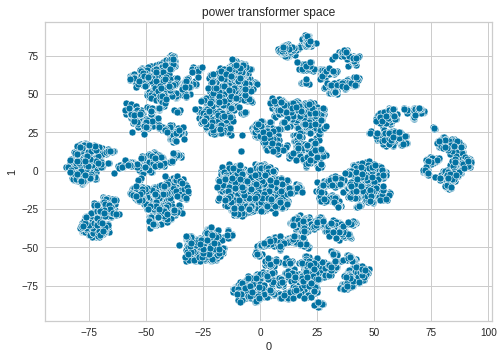

In [ ]:
tsne_pca = TSNE(n_components=2, 
                       n_jobs=-1, 
                       random_state=42)
tsne_po = tsne_pca.fit_transform(df_po)
tsne_df_po = pd.DataFrame(tsne_po, index=df.index)
sns.scatterplot(x=tsne_df_po[0], y=tsne_df_po[1]).set(title='power transformer space')

Power scaller has made good job amongst others scaller so we will continue using it

# Is PCA better than Kernel PCA?

In [ ]:
from sklearn.decomposition import PCA, KernelPCA

In [ ]:
pca = PCA(n_components=0.95)
pca_df = pca.fit_transform(df)
pca_df.shape

(8949, 5)

Text(0.5, 1.0, 'PCA(n_components=0.95)')

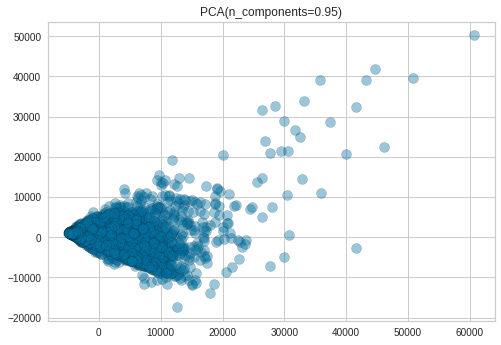

In [ ]:
plt.scatter(pca_df[:,0], pca_df[:,1],alpha=.4,s=100, edgecolors='k') 
plt.title(pca)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[Text(0.5, 1.0, 'pca data')]

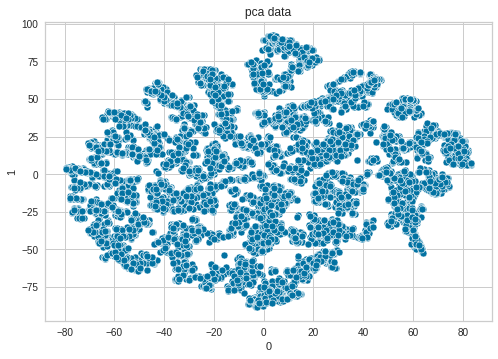

In [ ]:
tsne= TSNE(n_components=2, 
                       n_jobs=-1, 
                       random_state=42)
tsne_df = tsne.fit_transform(pca_df)
tsne_df_pca = pd.DataFrame(tsne_df, index=df.index)
sns.scatterplot(x=tsne_df_pca[0], y=tsne_df_pca[1]).set(title='pca data')

Text(0.5, 1.0, "KernelPCA(kernel='rbf', n_components=9)")

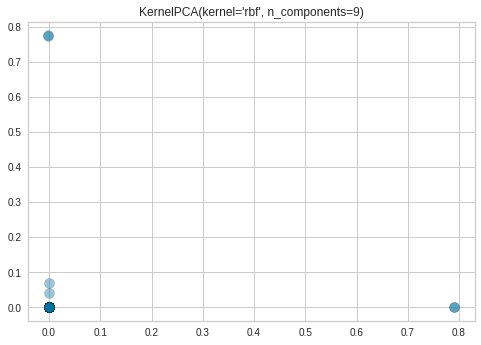

In [ ]:
K_pca=KernelPCA(n_components=9,kernel='rbf')
k_df=K_pca.fit_transform(df)
plt.scatter(k_df[:,0], k_df[:,1],alpha=.4,s=100, edgecolors='k') 
plt.title(K_pca)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[Text(0.5, 1.0, 'kernel pca data')]

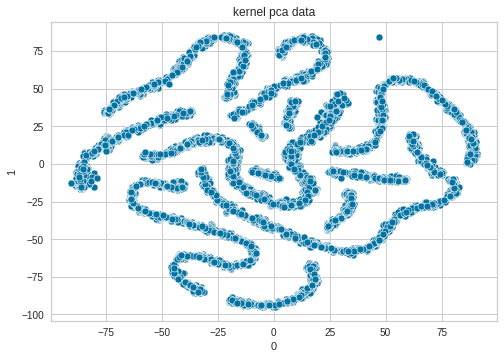

In [ ]:
tsne= TSNE(n_components=2, 
                       n_jobs=-1, 
                       random_state=42)
tsne_kdf = tsne.fit_transform(k_df)
tsne_df_pca = pd.DataFrame(tsne_kdf, index=df.index)
sns.scatterplot(x=tsne_df_pca[0], y=tsne_df_pca[1]).set(title='kernel pca data')

Kernel pca with rbf is chosed

# Is silhouette score best metric do use, try different evaluation metrics and comment on the result

https://analyticsindiamag.com/a-tutorial-on-various-clustering-evaluation-metrics/
* Silhouette Score
* Calinski Harabaz Index
* Davies Bouldin index

In [ ]:
df_pca=PCA(0.95).fit_transform(df_po)
K_pca=KernelPCA(n_components=9,kernel='rbf')
df_kpca=K_pca.fit_transform(df_po)

# try all unsupervised algorithms that you studied 

In [ ]:
from sklearn.cluster import KMeans , DBSCAN 

kmeans <br>
* 1- on pca data 
* 2- on kpca data

In [ ]:
n_clusters=15
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(df_pca)
    cost.append(kmean.inertia_) 


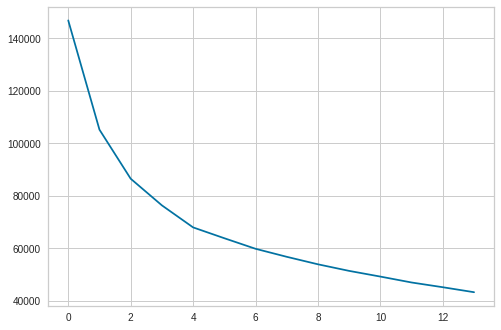

In [ ]:
plt.plot(cost, 'bx-')

In [ ]:
k4=KMeans(4)
k6=KMeans(6)
k4.fit(df_pca)
k6.fit(df_pca)

KMeans(n_clusters=6)

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8349f5210>,
                     colors='yellowbrick', estimator=KMeans(n_clusters=6))

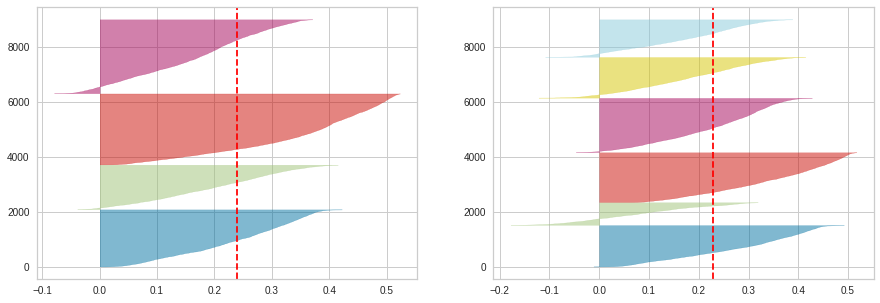

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
from yellowbrick.cluster import SilhouetteVisualizer
visualizer = SilhouetteVisualizer(k4, colors='yellowbrick', ax=ax[0])
visualizer.fit(df_pca)        # Fit the data to the visualizer
# visualizer.show()        # Finalize and render the figure
visualizer = SilhouetteVisualizer(k6, colors='yellowbrick', ax=ax[1])
visualizer.fit(df_pca)        # Fit the data to the visualizer
# visualizer.show()        # Finalize and render the figure

In [ ]:
tsne_pca = TSNE(n_components=2, 
                       n_jobs=-1, 
                       random_state=42)
tsne_po = tsne_pca.fit_transform(df_pca)
tsne_df_po = pd.DataFrame(tsne_po, index=df.index)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[Text(0.5, 1.0, 'power transformer space 6 labels')]

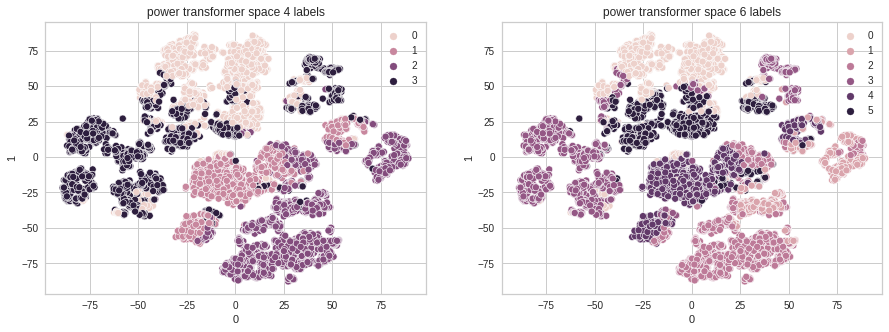

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.scatterplot(x=tsne_df_po[0], y=tsne_df_po[1],hue=k4.labels_,ax=ax[0]).set(title='power transformer space 4 labels')
sns.scatterplot(x=tsne_df_po[0], y=tsne_df_po[1],hue=k6.labels_,ax=ax[1]).set(title='power transformer space 6 labels')


In [ ]:
n_clusters=15
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(df_kpca)
    cost.append(kmean.inertia_) 


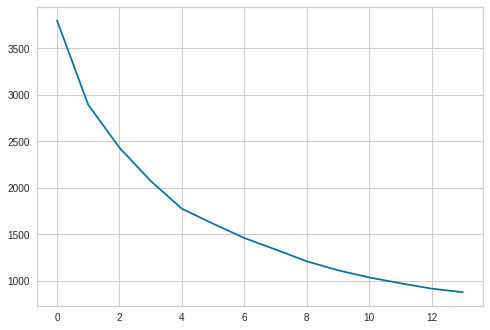

In [ ]:
plt.plot(cost, 'bx-')

In [ ]:
k4=KMeans(4)
k6=KMeans(6)
k4.fit(df_kpca)
k6.fit(df_kpca)

KMeans(n_clusters=6)

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa83485c090>,
                     colors='yellowbrick', estimator=KMeans(n_clusters=6))

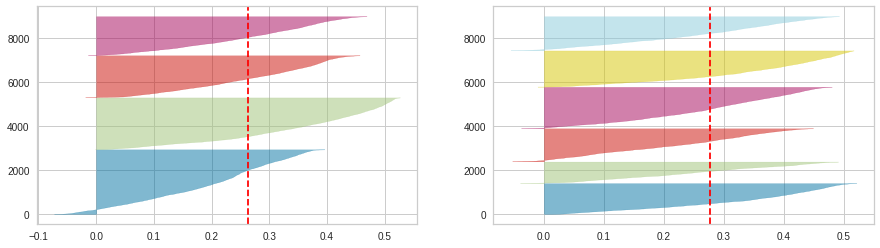

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,4))
from yellowbrick.cluster import SilhouetteVisualizer
visualizer = SilhouetteVisualizer(k4, colors='yellowbrick', ax=ax[0])
visualizer.fit(df_kpca)        # Fit the data to the visualizer
# visualizer.show()        # Finalize and render the figure
visualizer = SilhouetteVisualizer(k6, colors='yellowbrick', ax=ax[1])
visualizer.fit(df_kpca)        # Fit the data to the visualizer
# visualizer.show()        # Finalize and render the figure

In [ ]:
tsne_pca = TSNE(n_components=2, 
                       n_jobs=-1, 
                       random_state=42)
tsne_po = tsne_pca.fit_transform(df_kpca)
tsne_df_po = pd.DataFrame(tsne_po, index=df.index)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[Text(0.5, 1.0, 'power transformer space 6 labels')]

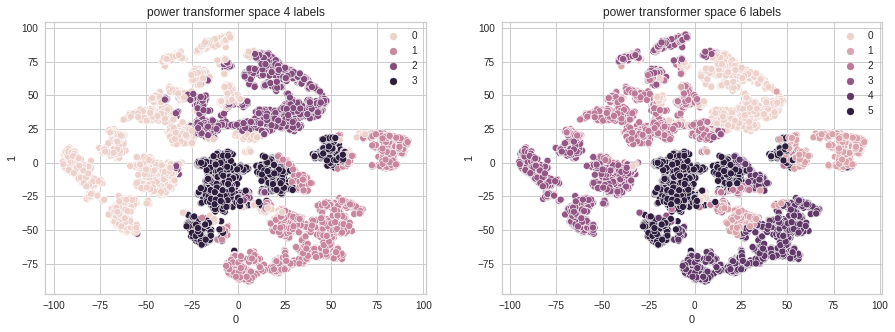

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.scatterplot(x=tsne_df_po[0], y=tsne_df_po[1],hue=k4.labels_,ax=ax[0]).set(title='power transformer space 4 labels')
sns.scatterplot(x=tsne_df_po[0], y=tsne_df_po[1],hue=k6.labels_,ax=ax[1]).set(title='power transformer space 6 labels')

hirrarical

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

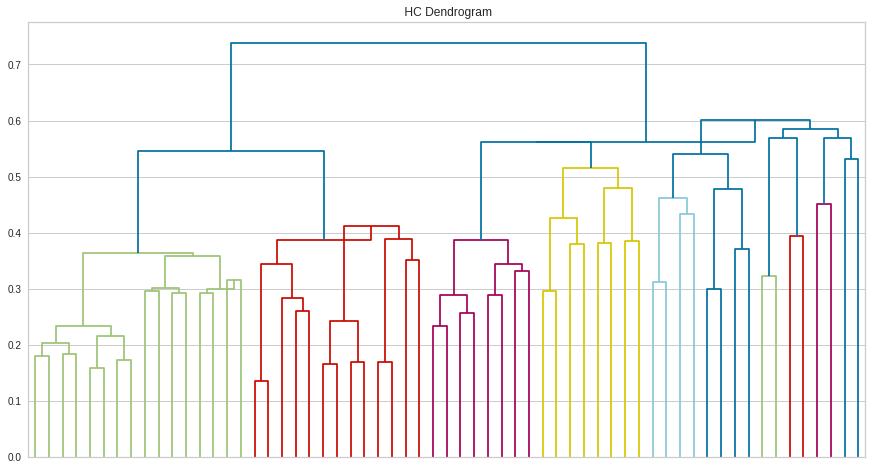

In [ ]:
hc = linkage(df_kpca,method='centroid')
plt.figure(figsize=(15,8))
plt.title(' HC Dendrogram')
dendrogram(hc, truncate_mode='level', p = 5, show_leaf_counts=False, no_labels=True)
plt.show()

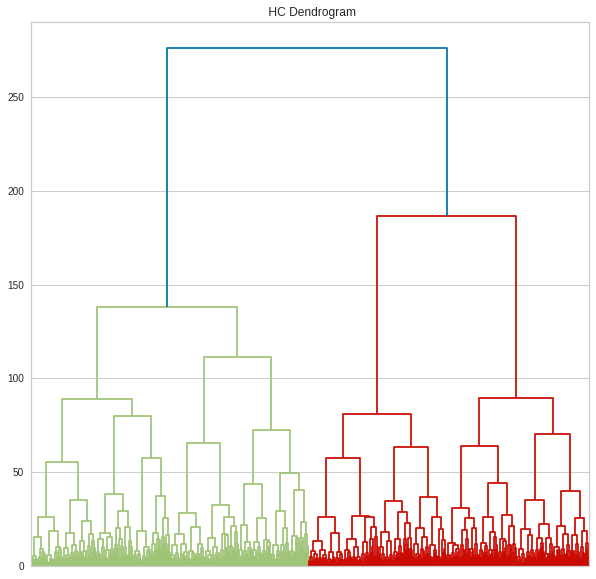

In [ ]:
hc = linkage(df_pca, method='ward')
plt.figure(figsize=(10,10))
plt.title(' HC Dendrogram')
dendrogram(hc, truncate_mode='level', p = 10, show_leaf_counts=False, no_labels=True)
plt.show()

# compare between EM and DBSCAN and isolated random forest as anomaly detection algorithm

dbcscan

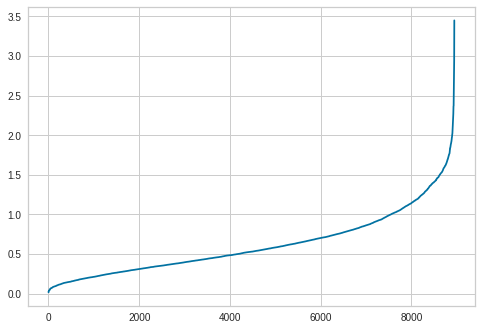

In [ ]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
neighbors = NearestNeighbors(n_neighbors=30)
neighbors_fit = neighbors.fit(df_pca)
distances, indices = neighbors_fit.kneighbors(df_pca)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
db= DBSCAN(eps=1, min_samples=30).fit(df_pca)
print(set(db.labels_))
silhouette_score(df,db.labels_)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, -1}


-0.4411555982194375

In [ ]:
db= DBSCAN(eps=1.5, min_samples=30).fit(df_pca)
print(set(db.labels_))
silhouette_score(df,db.labels_)

{0, 1, 2, 3, 4, -1}


-0.3319831875518022

In [ ]:
db= DBSCAN(eps=.5, min_samples=30).fit(df_pca)
print(set(db.labels_))
silhouette_score(df,db.labels_)

{0, 1, -1}


-0.3739853293367291

In [ ]:
db= DBSCAN(eps=1.5, min_samples=20).fit(df_pca)
print(set(db.labels_))
silhouette_score(df,db.labels_)

{0, 1, 2, 3, 4, 5, 6, 7, -1}


-0.3592954052412609

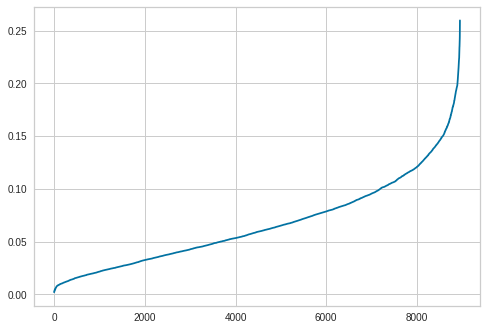

In [ ]:
neighbors = NearestNeighbors(n_neighbors=30)
neighbors_fit = neighbors.fit(df_kpca)
distances, indices = neighbors_fit.kneighbors(df_kpca)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
db= DBSCAN(eps=0.05, min_samples=30).fit(df_kpca)
print(set(db.labels_))
silhouette_score(df,db.labels_)

{0, 1, 2, 3, -1}


-0.4573992734053518

**EM**

In [ ]:
from sklearn import mixture
em = mixture.GaussianMixture(n_components=2,covariance_type="full",max_iter = 100,init_params="random")
em.fit(df_pca)
o = em.predict(df_pca)
silhouette_score(df_pca,o)

0.1283252965615918

In [ ]:
em = mixture.GaussianMixture(n_components=2,covariance_type="full",max_iter = 100,init_params="random")
em.fit(df_kpca)
o = em.predict(df_kpca)
silhouette_score(df_kpca,o)

0.2153388755512885

isolation forest

In [ ]:
from sklearn.ensemble import IsolationForest
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(df_pca)
df['scores']=model.decision_function(df_pca)
df['anomaly']=model.predict(df_pca)
silhouette_score(df_kpca,df['anomaly'])

-0.060323689370701816

In [ ]:
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(df_kpca)
df['scores']=model.decision_function(df_kpca)
df['anomaly']=model.predict(df_kpca)
silhouette_score(df_kpca,df['anomaly'])

0.06303304890613907